In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df = pd.read_csv('/Users/delinaivanova/Library/CloudStorage/OneDrive-Personal/UoT/Micro Courses/Data Science/3250 A/Module 5/CustomersTransactions2021.csv')

In [11]:
df.head()

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category
0,1001,1,Debit,165.78,Johnny Awesome,3,ON,1,wealth
1,1001,2,Credit,42.10,Johnny Awesome,3,ON,1,wealth
2,1001,4,Credit,103.03,Johnny Awesome,3,ON,1,wealth
3,1001,5,Credit,56.60,Johnny Awesome,3,ON,1,wealth
4,1002,6,Debit,214.34,Bob Marley,4,ON,1,personal_banking


In [9]:
# line chart
df.sort_values('id', inplace=True)

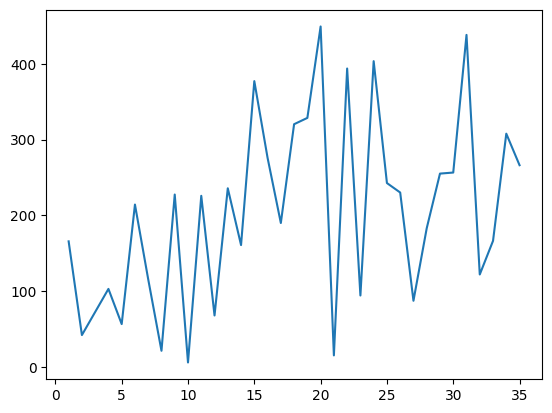

In [12]:
# line chart
plt.plot(df['id'],df['txn_total'])

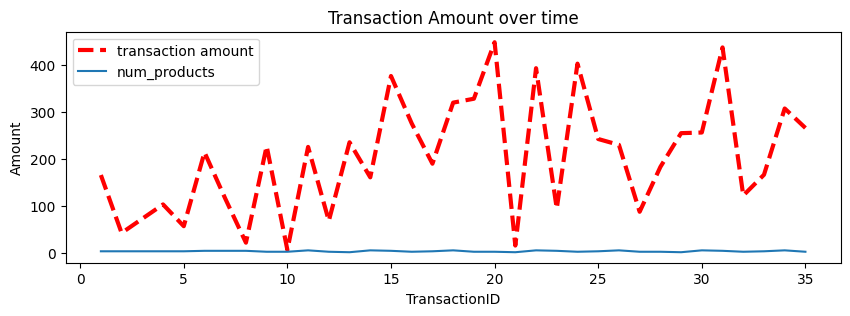

In [36]:
# to edit the figure of the chart, we need to first use a figure() function, and then the plot() function allows us to edit the line itself
viz = plt.figure(figsize=(10,3))
plt.plot(df['id'],df['txn_total'],'--', linewidth=3,label='transaction amount', color='r') # color, linewidth and line style visual
plt.plot(df['id'],df['Products'], label='num_products')
plt.xlabel('TransactionID')
plt.ylabel('Amount')
plt.title('Transaction Amount over time')
plt.legend()
plt.show()

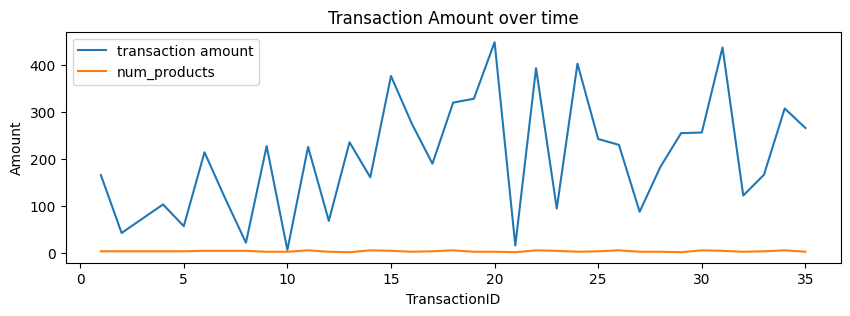

In [28]:
viz

<BarContainer object of 34 artists>

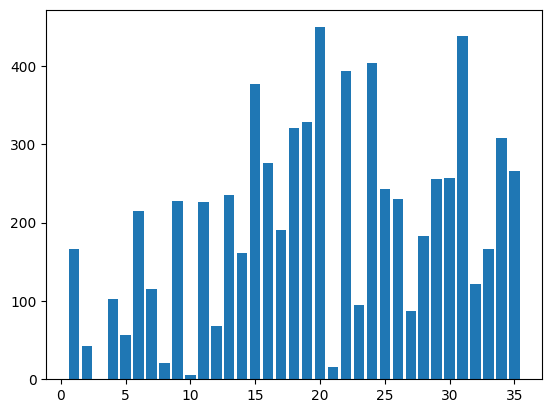

In [38]:
# bar chart
plt.bar(df['id'],df['txn_total'])

Text(Cash, 2500, 'The cash amount is 2000')

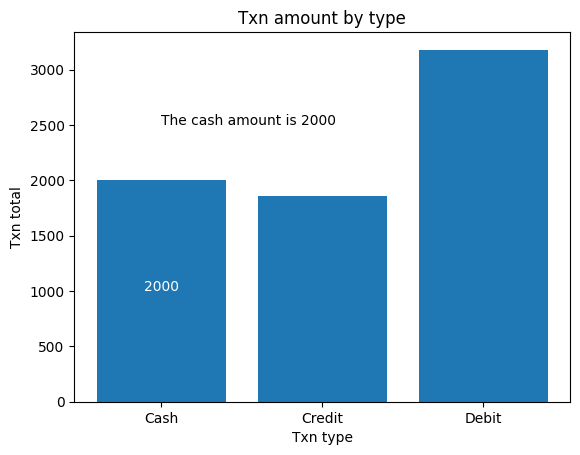

In [53]:
# what is the total transaction about my txn_type?
txn_type = df.groupby('txn_type')['txn_total'].sum().to_frame().reset_index()
plt.bar(txn_type['txn_type'],txn_type['txn_total'])
plt.title('Txn amount by type')
plt.ylabel('Txn total')
plt.xlabel('Txn type')
plt.annotate('2000',('Cash',1000), ha='center',color='w')
plt.annotate('The cash amount is 2000',('Cash',2500))

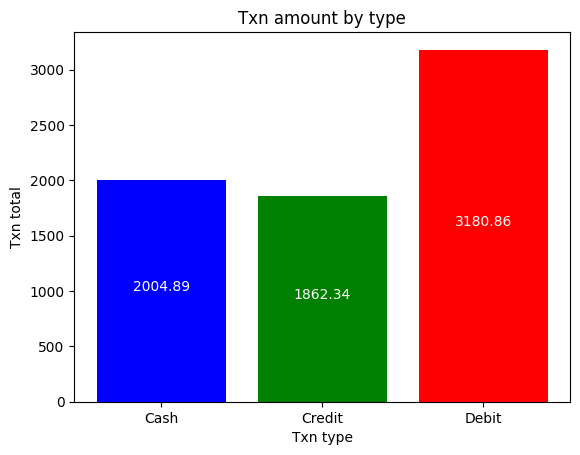

In [84]:
colors = ['b','g','r']

plt.bar(txn_type['txn_type'],txn_type['txn_total'], color=colors)
plt.title('Txn amount by type')
plt.ylabel('Txn total')
plt.xlabel('Txn type')

for x,y in enumerate(txn_type['txn_total']):
    plt.annotate(format(y,".2f"),(x,y), ha='center',xytext=(x,y/2),color='w')


In [54]:
for x,y in enumerate(txn_type['txn_total']):
    print(x)
    print(y)

0
2004.89
1
1862.3400000000001
2
3180.86


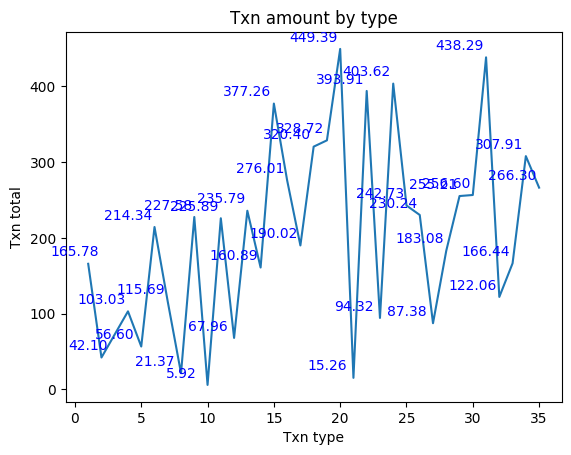

In [73]:
plt.plot(df['id'],df['txn_total'])
plt.title('Txn amount by type')
plt.ylabel('Txn total')
plt.xlabel('Txn type')

for x,y in enumerate(df['txn_total']):
    plt.annotate(format(y,".2f"),(x,y), ha='center',xytext=(x,y+10),color='b')

([<matplotlib.patches.Wedge at 0x1363fead0>,
 [Text(0.7518828739683046, 0.935239083781876, 'Cash'),
  Text(-0.9523119872161347, 0.5505468908317044, 'Credit'),
  Text(0.1676118552052522, -1.0871551250831932, 'Debit')],
 [Text(0.4385983431481776, 0.5455561322060943, '28.4%'),
  Text(-0.5194429021178916, 0.3002983040900205, '26.4%'),
  Text(0.09142464829377393, -0.5929937045908327, '45.1%')])

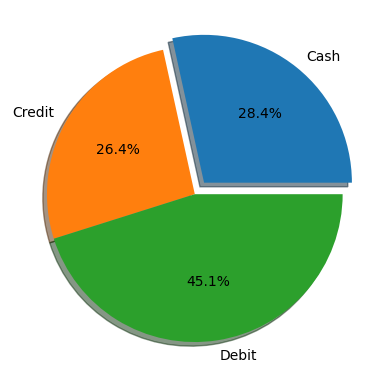

In [82]:
# pie chart demo for showing percentage composition
plt.pie(txn_type['txn_total'], labels=txn_type['txn_type'], autopct='%1.1f%%', explode=(0.1,0,0), shadow=True)

(array([0.00265288, 0.00265288, 0.00198966, 0.00265288, 0.00265288,
        0.00397931, 0.00132644, 0.00132644, 0.00198966, 0.00132644]),
 array([  5.92 ,  50.267,  94.614, 138.961, 183.308, 227.655, 272.002,
        316.349, 360.696, 405.043, 449.39 ]),
 [<matplotlib.patches.Polygon at 0x136968910>])

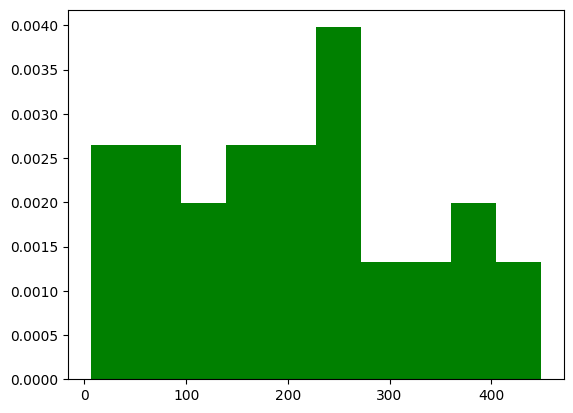

In [96]:
# histogram
plt.hist(df['txn_total'], density=True, facecolor='g', histtype='stepfilled', rwidth=0.8, orientation='vertical')

{'whiskers': [<matplotlib.lines.Line2D at 0x136c45810>,
 'caps': [<matplotlib.lines.Line2D at 0x136c62d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x136c60d90>],
 'medians': [<matplotlib.lines.Line2D at 0x136c6c150>],
 'fliers': [<matplotlib.lines.Line2D at 0x136bfee90>],
 'means': []}

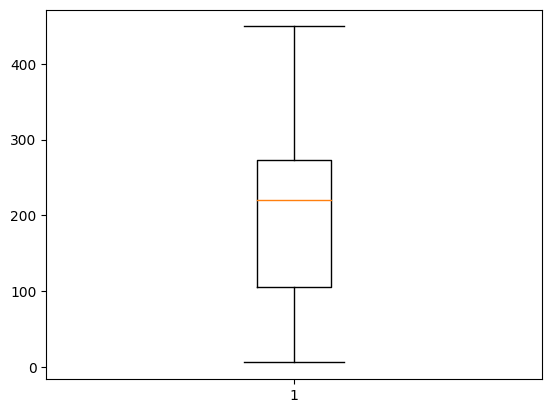

In [102]:
plt.boxplot(df['txn_total'], meanline=True, showcaps=True, showfliers=True, capwidths=0.2)

<Axes: title={'center': 'txn_total over time'}, xlabel='id', ylabel='txn_total'>

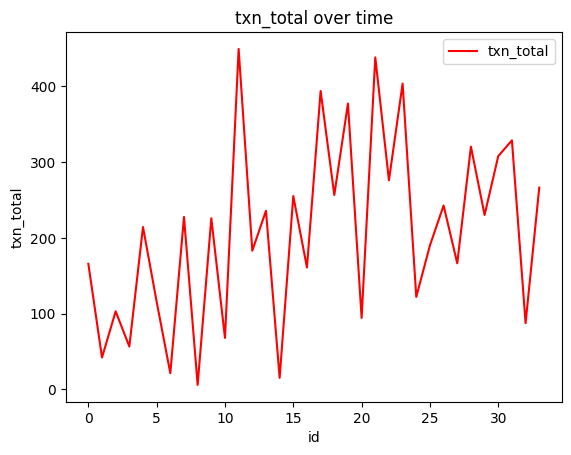

In [114]:
# pandas plot
df.sort_index()['txn_total'].plot(kind='line',c='r',title='txn_total over time', xlabel='id',ylabel='txn_total', legend=True)

<Axes: title={'center': 'txn_total over time'}, xlabel='id', ylabel='txn_total'>

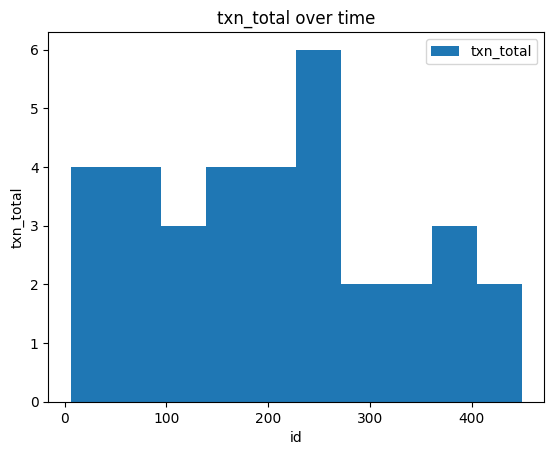

In [119]:
# pandas plot
df.sort_index()['txn_total'].plot(kind='hist',title='txn_total over time', xlabel='id',ylabel='txn_total', legend=True)


In [121]:
df.groupby(['Category','txn_type'])['txn_total'].sum()

Category          txn_type
hnw               Cash         652.01
                  Credit       451.15
                  Debit        461.68
personal_banking  Cash         961.75
                  Credit       815.55
                  Debit       1668.49
wealth            Cash         391.13
                  Credit       595.64
                  Debit       1050.69
Name: txn_total, dtype: float64

In [122]:
df.groupby(['Category','txn_type'])['txn_total'].sum().unstack('txn_type')

txn_type,Cash,Credit,Debit
Category,,,
hnw,652.01,451.15,461.68
personal_banking,961.75,815.55,1668.49
wealth,391.13,595.64,1050.69


<Axes: xlabel='Category'>

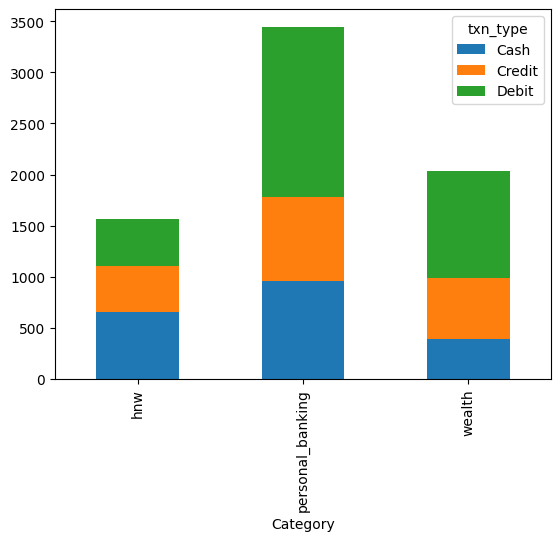

In [123]:
df.groupby(['Category','txn_type'])['txn_total'].sum().unstack('txn_type').plot(kind='bar',stacked=True)

<Axes: ylabel='txn_total'>

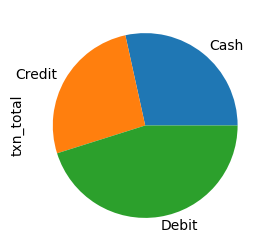

In [125]:
df.groupby('txn_type')['txn_total'].sum().plot(kind='pie', figsize=(10,3))

In [126]:
df.Category.unique()

array(['wealth', 'personal_banking', 'hnw'], dtype=object)

In [127]:
# subplots
wealth = df[df['Category']=='wealth']
pb = df[df['Category']=='personal_banking']

Text(0.5, 0, 'txn_type')

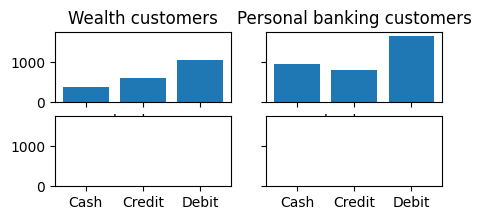

In [151]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(5,2), sharey=True, sharex=True)

ax1.bar(wealth.groupby('txn_type')['txn_total'].sum().to_frame().reset_index()['txn_type'],wealth.groupby('txn_type')['txn_total'].sum().to_frame().reset_index()['txn_total'])
ax2.bar(pb.groupby('txn_type')['txn_total'].sum().to_frame().reset_index()['txn_type'],pb.groupby('txn_type')['txn_total'].sum().to_frame().reset_index()['txn_total'])

ax1.set_title('Wealth customers')
ax2.set_title('Personal banking customers')

ax1.set_xlabel('txn_type')
ax2.set_xlabel('txn_type')




<Axes: xlabel='Relationship', ylabel='Products'>

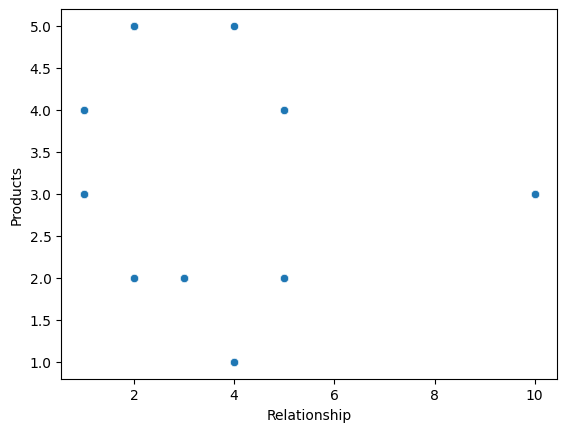

In [152]:
# seaborn
sns.scatterplot(x='Relationship',y='Products',data=df)

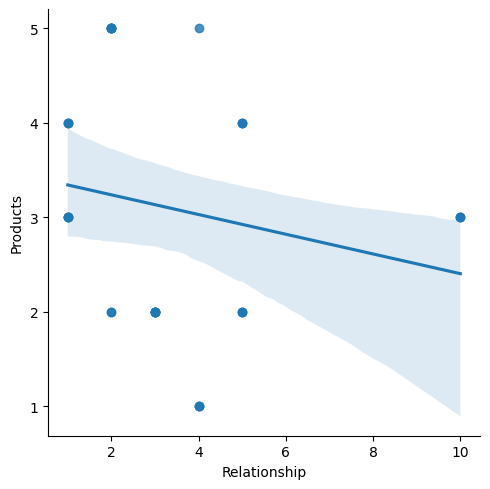

In [153]:
sns.lmplot(x='Relationship',y='Products',data=df)

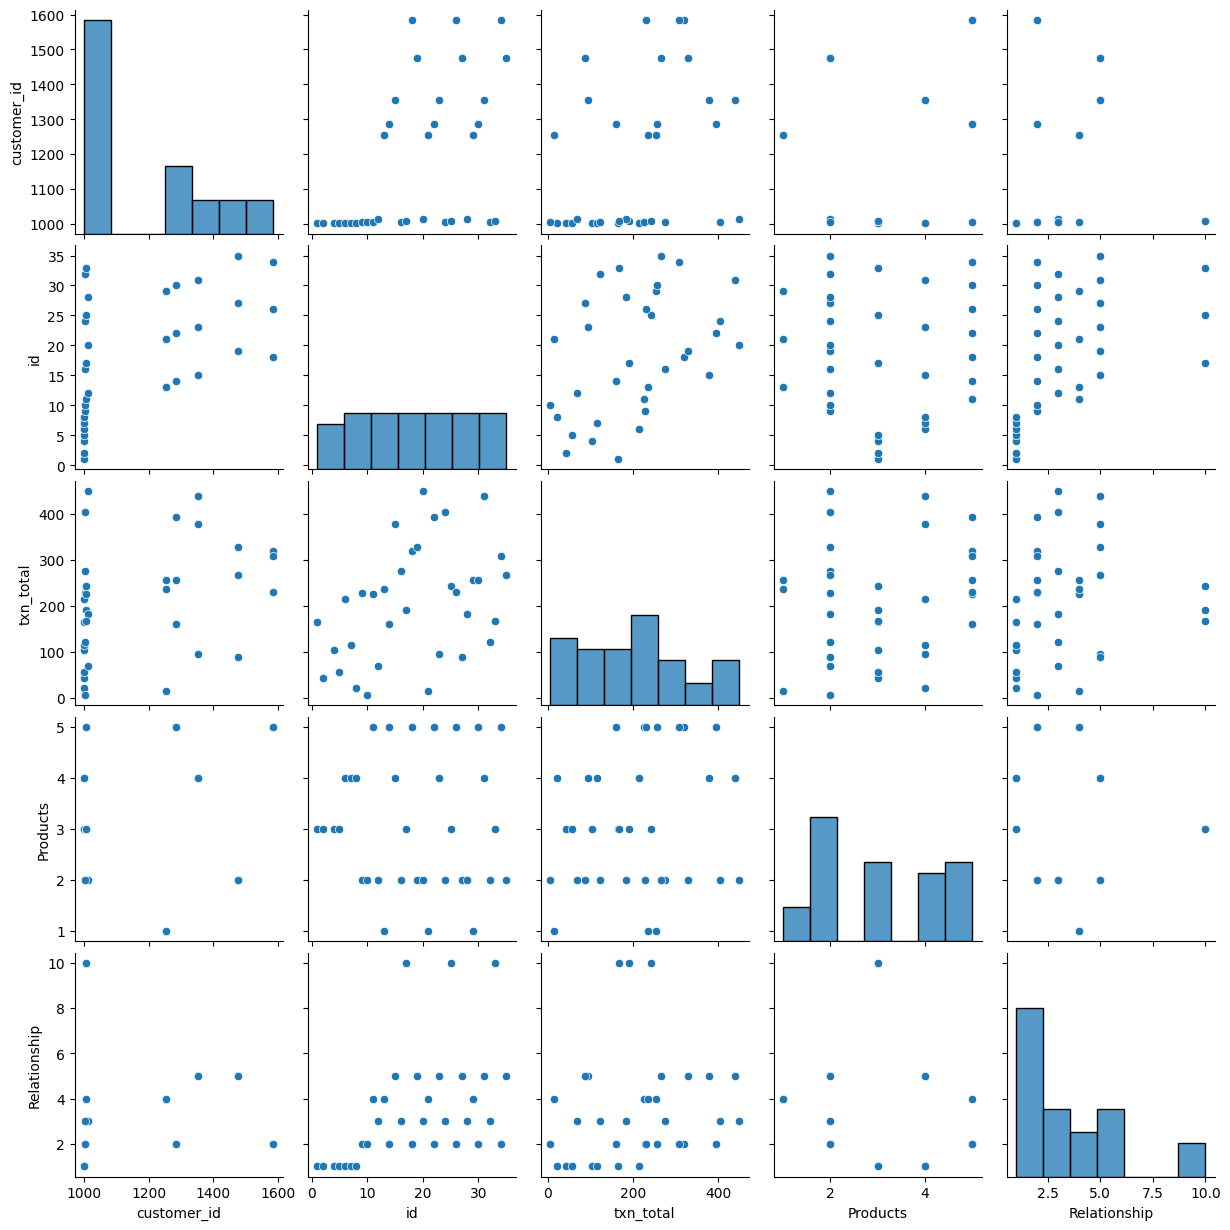

In [154]:
sns.pairplot(df)

<Axes: xlabel='txn_type', ylabel='txn_total'>

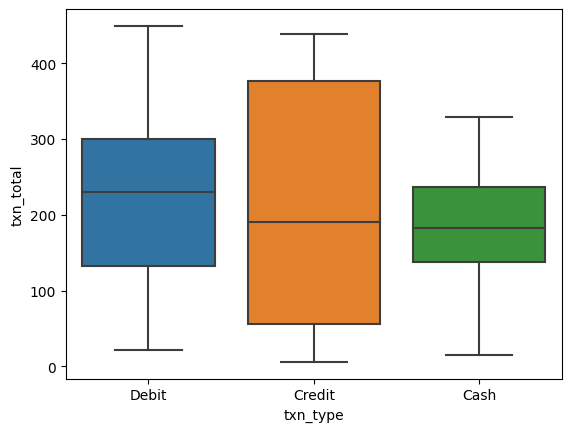

In [155]:
sns.boxplot(x='txn_type',y='txn_total',data=df)

<Axes: xlabel='txn_type', ylabel='txn_total'>

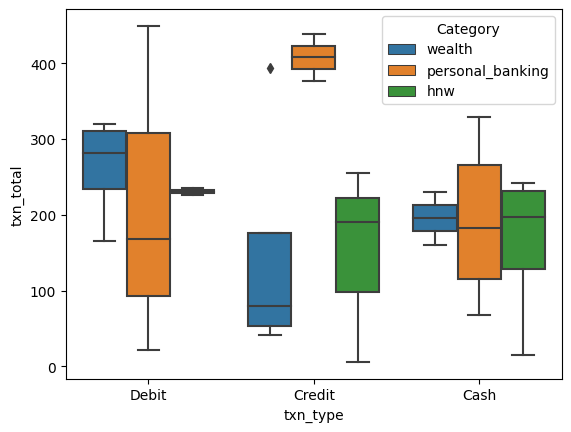

In [156]:
sns.boxplot(x='txn_type',y='txn_total',hue='Category',data=df)

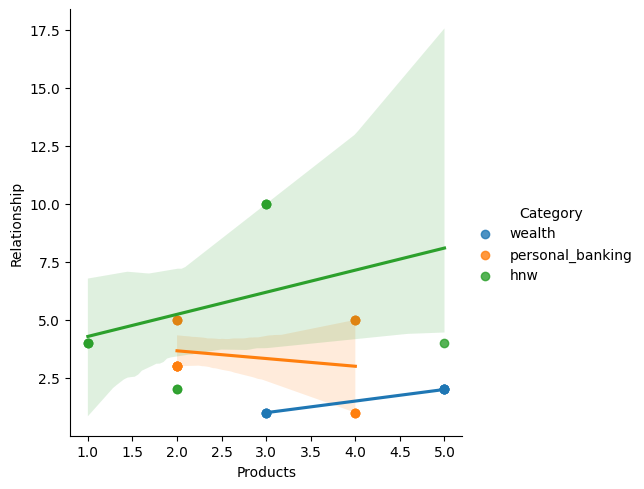

In [157]:
sns.lmplot(x='Products',y='Relationship',hue='Category',data=df)

<Axes: xlabel='Products', ylabel='txn_total'>

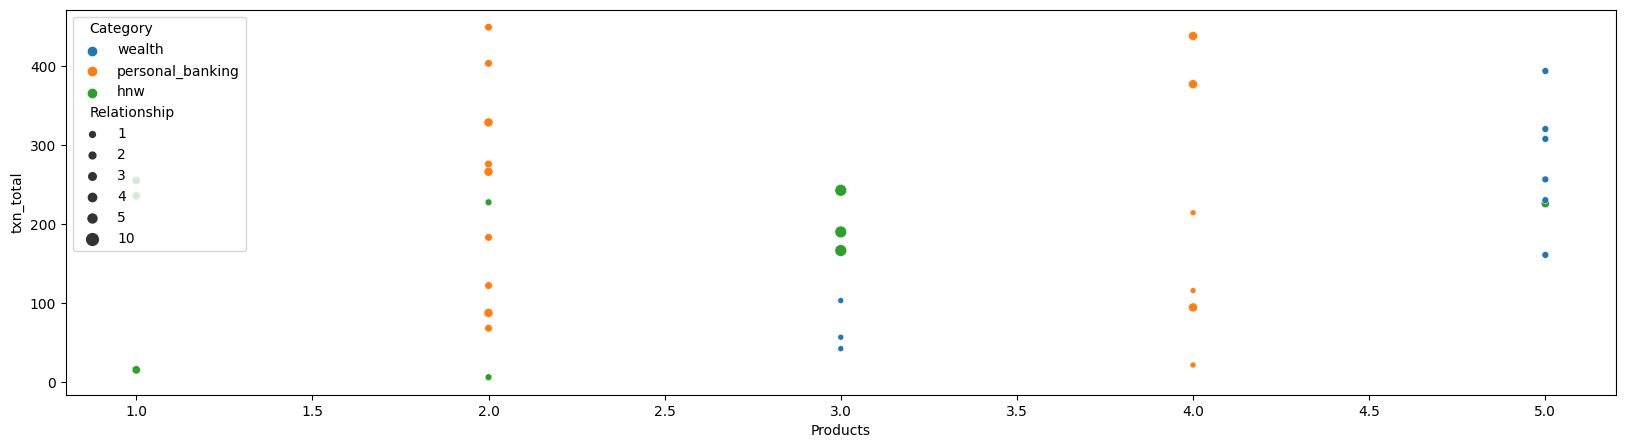

In [164]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['Products'],y=df['txn_total'], hue=df['Category'], size=df['Relationship'])

<Axes: >

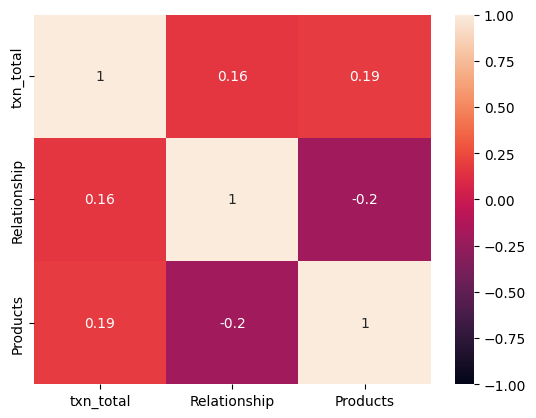

In [169]:
# use heatmap to plot pearsons correlation
sns.heatmap(df[['txn_total','Relationship','Products']].corr(), vmin=-1,vmax=1, annot=True)
plt.savefig('filepath/filename.png')